In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random 
def rjitt(arr):
  stdev = .01 *(max(arr)-min(arr))
  return arr + np.random.rand(len(arr)) * stdev

In [19]:
# loading sample data
cs1 = pd.read_csv('/content/drive/My Drive/ML/cust_seg/cust_seg_smpl_280122.csv', encoding = 'cp949', thousands = ',')

print(cs1.columns)
print(cs1.shape)
cs1.head()

Index(['고객명', '성별', '연령', '지역', '구매일수', '최종구매후기간', '구매서적수', '서적구매액', '기타상품구매액',
       '총구매액', '관심쟝르', '구매쟝르수', '가입기간', 'SMS수신여부'],
      dtype='object')
(20, 14)


,고객명,성별,연령,지역,구매일수,최종구매후기간,구매서적수,서적구매액,기타상품구매액,총구매액,관심쟝르,구매쟝르수,가입기간,SMS수신여부
0,한지민,여,17,부산,5,2,8,96000,38400,134400,소설,2,12,수신
1,장이성,남,19,서울,2,2,3,36000,14400,50400,과학,1,24,수신
2,이수문,남,21,서울,20,1,22,286000,214500,500500,소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,60000,24000,84000,시,1,16,수신
4,염시훈,남,26,서울,3,5,4,160000,64000,224000,소설,3,9,수신


In [20]:
# 한글로된 컬럼명이 싫어서 -- 인코딩으로 발생될 수 있는 만의 하나의 문제를 회피
cs1.columns = ["cust_name", "sex", "age", "location", "days_purchase",
   "recency", "num_books", "amt_books", "amt_non_book",
   "amt_total", "interest_genre", "num_genre",
   "membership_period", "sms_optin"]
cs1.head()

,cust_name,sex,age,location,days_purchase,recency,num_books,amt_books,amt_non_book,amt_total,interest_genre,num_genre,membership_period,sms_optin
0,한지민,여,17,부산,5,2,8,96000,38400,134400,소설,2,12,수신
1,장이성,남,19,서울,2,2,3,36000,14400,50400,과학,1,24,수신
2,이수문,남,21,서울,20,1,22,286000,214500,500500,소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,60000,24000,84000,시,1,16,수신
4,염시훈,남,26,서울,3,5,4,160000,64000,224000,소설,3,9,수신


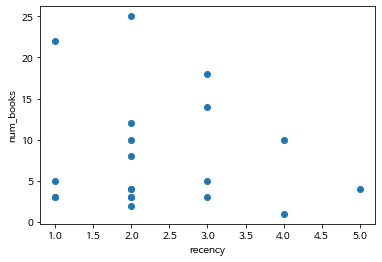

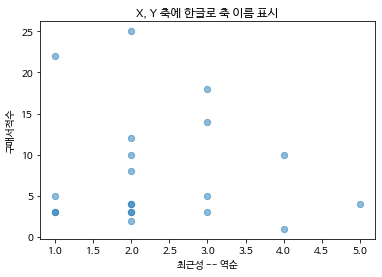

In [21]:
# 최종구매후기간 recency와 구매한 서적의 수 사이의 관계 확인

# 한글 폰트 표시 지정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
# 폰트 위치와 이름 지정
# matplotlib 설정

plt.scatter(cs1['recency'], cs1['num_books'])
plt.xlabel('recency')
plt.ylabel('num_books')
plt.show()

plt.scatter(cs1['recency'], cs1['num_books'], s=40, alpha=0.5)
plt.title('X, Y 축에 한글로 축 이름 표시')
plt.xlabel('최근성 -- 역순')
plt.ylabel('구매서적수')
plt.show()

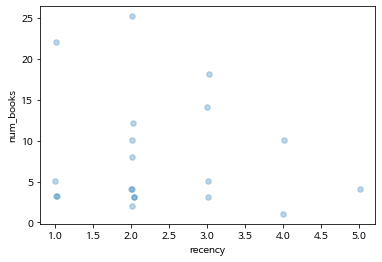

In [22]:
# 동일 좌표에 다수의 고객 존재 가능성이 있으므로 jitter 사용자 정의 함수를 활용

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')
plt.show()

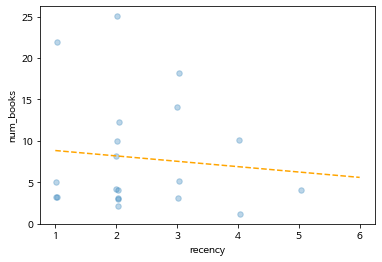

In [23]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['recency']
y = cs1['num_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 1

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(7)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


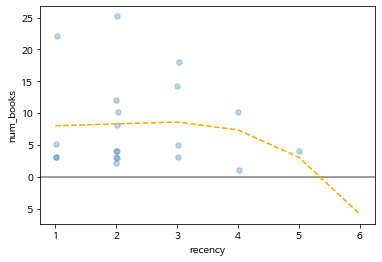

In [24]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['recency']
y = cs1['num_books']
# 회귀함수의 차수 지정
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(7)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')
plt.axhline(0, color='grey')
plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 구매서적의 수가 음수가 되는 것은 허용되지 않는 값임

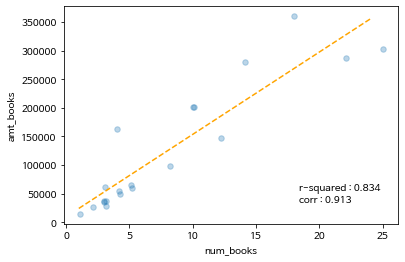

In [29]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['num_books']
y = cs1['amt_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 1

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), np.array(y))
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))
rsq = model.score(np.array(x).reshape(-1, 1), y)

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['amt_books']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('amt_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(x.quantile(0.9), y.quantile(0.2), 'corr : ' + str(round(np.corrcoef(x, y)[0][1], 3)))
plt.text(x.quantile(0.9), y.quantile(0.4), 'r-squared : ' + str(round(rsq, 3)))
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음

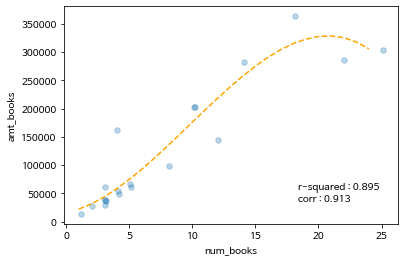

In [30]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['num_books']
y = cs1['amt_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))
rsq = model.score(np.array(x).reshape(-1, 1), y)

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['amt_books']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('amt_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(x.quantile(0.9), y.quantile(0.2), 'corr : ' + str(round(np.corrcoef(x, y)[0][1], 3)))
plt.text(x.quantile(0.9), y.quantile(0.4), 'r-squared : ' + str(round(rsq, 3)))
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음. 단, 구매수량이 증가한다고 
# 금액이 무한정 증가하는지는 확실하지 않음

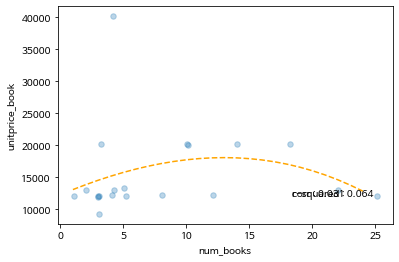

In [32]:
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']

x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))
rsq = model.score(np.array(x).reshape(-1, 1), y)

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(x.quantile(0.9), y.quantile(0.2), 'corr : ' + str(round(np.corrcoef(x, y)[0][1], 3)))
plt.text(x.quantile(0.9), y.quantile(0.4), 'r-squared : ' + str(round(rsq, 3)))
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남

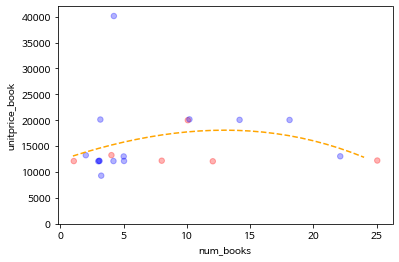

In [33]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']


x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
           s=30, alpha=0.3, color=colors1)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')
# 0에서 부터 출발하도록 Y축의 구간을 변경
# 변동이 크게 보이는 착시를 완화
# 표시할 값 중 최대의 105% 까지로 자동 설정 
plt.ylim(0,cs1['unitprice_book'].max()*1.05)
plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남
# 여성의 경우 구매금액이 매우 큰 경우가 없었음

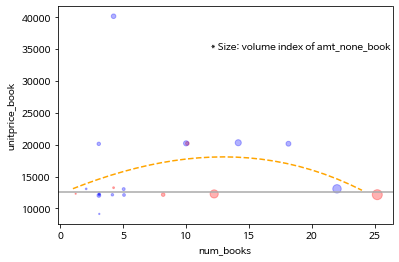

In [34]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']


x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
            s=100*cs1['amt_non_book']/cs1['amt_non_book'].max(), 
            alpha=0.3, color=colors1)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(12,35000, '* Size: volume index of amt_none_book')
# text 함수를 사용해서 주석 달아주기
plt.axhline(cs1['unitprice_book'].median(), color='darkgrey')
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남
# 여성의 경우 구매금액이 매우 큰 경우가 없었음

## Grid 방식의 고객 세분화


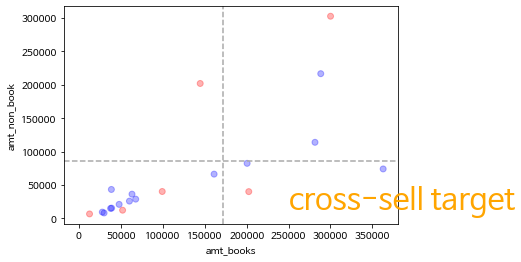

In [36]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

x = cs1['amt_books']
y = cs1['amt_non_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['amt_books']), rjitt(cs1['amt_non_book']),
            alpha=0.3, color=colors1)
plt.xlabel('amt_books')
plt.ylabel('amt_non_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(250000,15000, 'cross-sell target', size = 30, color = 'orange')
# text 함수를 사용해서 주석 달아주기
plt.axvline(cs1['amt_books'].quantile(0.7), color='darkgrey', linestyle='--')
plt.axhline(cs1['amt_non_book'].quantile(0.8), color='darkgrey', linestyle='--')
plt.show()

# 책을 많이 사는 편인데 책쪽만 집중된 경우를 기타 상품군에 대한
# 교차판매용 대상으로
# == 서적 구매는 많으나 기타 상품 구매가 약한 집단을 선정해
# 집중적 cross-selling 노력 기울이는 방안?

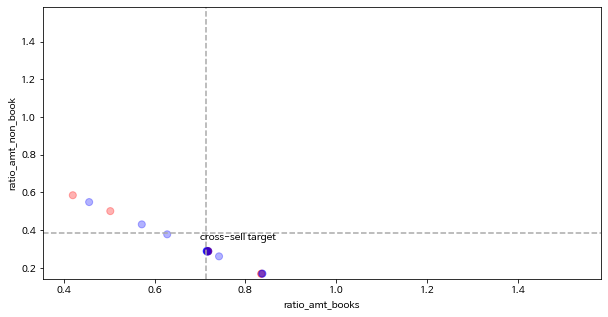

In [41]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

x = (cs1['amt_books'] / cs1['amt_total'])
y = (cs1['amt_non_book'] / cs1['amt_total'])
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.figure(figsize = (10, 5))
plt.scatter(rjitt(x), rjitt(y), s= 50,
            alpha=0.3, color=colors1)
plt.xlabel('ratio_amt_books')
plt.ylabel('ratio_amt_non_book')
plt.xlim(x.min() * 0.85, y.max() * 1 + 1)
plt.ylim(y.min() * 0.85, y.max() * 1 + 1)

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(0.7,0.35, 'cross-sell target')
# text 함수를 사용해서 주석 달아주기
plt.axvline(x.quantile(0.7), color='darkgrey', linestyle='--')
plt.axhline(y.quantile(0.8), color='darkgrey', linestyle='--')
plt.show()

# 비율로

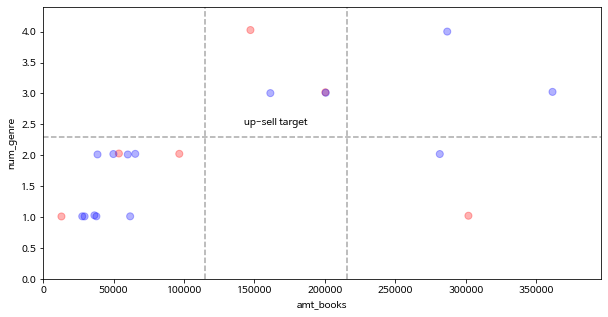

In [47]:
max_x = cs1['age'].max()
min_x = cs1['age'].min()
color1 = [(1-((x-min_x) / (max_x - min_x)), 0, (x-min_x) / (max_x - min_x)) for x in cs1['age']]

x = cs1['amt_books']
y = cs1['num_genre']
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.figure(figsize = (10, 5))
plt.scatter(rjitt(x), rjitt(y), s = 50, alpha = 0.3, color = colors1)
plt.xlabel('amt_books')
plt.ylabel('num_genre')
plt.xlim(0, x.max() * 1.1)
plt.ylim(0, y.max() * 1.1)

plt.plot(x_reg, y_reg, color = 'orange', linestyle = '--')
plt.text(x.quantile(0.63), y.quantile(0.71), 'up-sell target')

plt.axvline(x.quantile(0.6), color = 'darkgrey', linestyle = '--')
plt.axvline(x.quantile(0.8), color = 'darkgrey', linestyle = '--')
plt.axhline(y.quantile(0.7), color = 'darkgrey', linestyle = '--')

plt.show()

# 여러 장르를 구매해도 금액이 작은 집단 = upsell target
# 연령으로 보면 나이가 많은 고객이 다수

In [49]:
tgtgridseg = cs1[(cs1['amt_books'] > cs1['amt_books'].quantile(0.7)) & 
                 (cs1['amt_non_book'] < cs1['amt_non_book'].quantile(0.8)) ]

print('number of cross-sell target customers : ', len(tgtgridseg),'\n')

print("size of target = ", 100* len(tgtgridseg)/ cs1.shape[0], " % of customer base")

tgtgridseg

number of cross-sell target customers :  3 

size of target =  15.0  % of customer base


,cust_name,sex,age,location,days_purchase,recency,num_books,amt_books,amt_non_book,amt_total,interest_genre,num_genre,membership_period,sms_optin,unitprice_book
8,민지화,여,29,서울,7,2,10,200000,40000,240000,NaN,3,21,수신,20000.0
9,윤신훈,남,32,광주,5,4,10,200000,80000,280000,소설,3,12,수신,20000.0
12,이정호,남,37,대전,11,3,18,360000,72000,432000,과학,3,18,NaN,20000.0


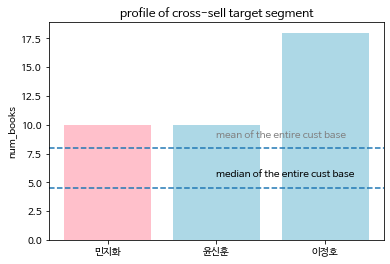

In [50]:
# 선정된 집단의 프로파일 시각적으로 확인

# 서적 구매수량과 성별 분포 확인 (여성은 pink)

colors2 = ['pink' if x=='여' else'lightblue' for x in tgtgridseg['sex']]
plt.bar(tgtgridseg['cust_name'], tgtgridseg['num_books'], 
        color=colors2)
plt.ylabel("num_books")

# 전체고객의 평균/중위수 서적구매수량과 비교

plt.axhline(cs1['num_books'].mean(), linestyle='--')
# font in grey color
plt.text(1,cs1['num_books'].mean()+1, 'mean of the entire cust base', color='grey')
plt.axhline(cs1['num_books'].median(), linestyle='--')
plt.text(1,cs1['num_books'].median()+1, 'median of the entire cust base')
plt.title('profile of cross-sell target segment')
plt.show()

# 전체 집단에 비해서는 서적 구매수량이 많은 집단
# 전체 집단에 비해서는 여성 비율이 조금은 더 높은 집단 (i.e. 0.33 > 0.3)    

# 기타 상품 중 여성 선호 상품을 찾아 제안하는 방식으로 cross-sell
# 테스트 캠페인 시도 가능할 것

In [52]:
# 성별 인원수 확인 -- 건수 대신 구성비 산출
cs1['sex'].value_counts(normalize=True).reset_index().sort_values(by='sex', ascending=False)

,index,sex
0,남,0.7
1,여,0.3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


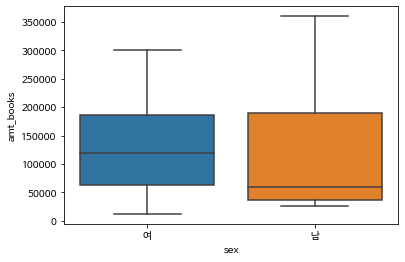

In [53]:
# 연령별 고객분포
import seaborn as sns

dfex = cs1[['amt_books', 'sex']]

sns.boxplot(x = 'sex', y = 'amt_books', data = dfex)
plt.show()

## 군집분석을 이용한 고객 세분화

In [54]:
# 군집분석을 활용한 고객세분화

# 수치형식의 중요 변수를 클러스터링에 사용하기 위해 지정 
vars4clst = [ "days_purchase", "recency", "num_books",
             "amt_books", "amt_non_book", "amt_total", "num_genre", "membership_period" ] 

cs2 = cs1[vars4clst]

# 선정된 변수들의 데이터 타입 확인
print(cs2.dtypes)

cs2.head()

days_purchase        int64
recency              int64
num_books            int64
amt_books            int64
amt_non_book         int64
amt_total            int64
num_genre            int64
membership_period    int64
dtype: object


,days_purchase,recency,num_books,amt_books,amt_non_book,amt_total,num_genre,membership_period
0,5,2,8,96000,38400,134400,2,12
1,2,2,3,36000,14400,50400,1,24
2,20,1,22,286000,214500,500500,4,15
3,4,3,5,60000,24000,84000,1,16
4,3,5,4,160000,64000,224000,3,9


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


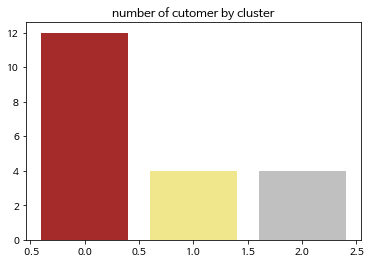

,clst,cust_count
0,0,12
1,1,4
2,2,4


In [55]:
from sklearn.cluster import KMeans  

# df 자체를 할당하는 대신 복제를 생성
df4kmm = cs2.copy()

# 타입변경은 사실 unnecessary 이미 수치형이라
X = np.array(df4kmm.astype(int))

# create k-means model
kmm1 = KMeans(n_clusters=3, random_state=111)  
# set seed using random_state option
kmm1.fit(X)  

# kmeans.cluster_centers_  

# 군집별 고객수 분포 확인
clst_label, clst_cust_counts = np.unique(kmm1.labels_, return_counts=True)

# 고객집단을 표시할 색상을 임의로 지정
# 번호순의 색상 이름 벡터 생성
colors3 = ['brown','khaki','silver']

plt.bar(clst_label, clst_cust_counts, color=colors3) 
plt.title('number of cutomer by cluster')
plt.show()

# 테이블 형태로 화면 출력하기 위해 임시 테이블 생성
pd.DataFrame({'clst': clst_label, 'cust_count': clst_cust_counts})

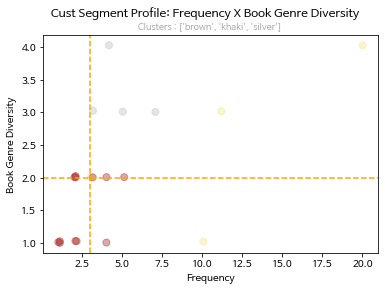

In [57]:
# 각 고객의 소속 집단이 어디인가에 따라 색상 표시
colors4 = [colors3[x] for x in  kmm1.labels_] 

plt.scatter(rjitt(cs1['days_purchase']), rjitt(cs1['num_genre']),
   color = colors4, s=50, alpha=0.4)

# subtitle 다는 기능이 직접적으로는 없음. 따라서 우회적 방법 활용
plt.suptitle("Cust Segment Profile: Frequency X Book Genre Diversity")
# title 대신 suptitle을 title 용도로 활용하고
subtitle_text = 'Clusters : ' + str(colors3)
# subtitle 용도로 title을 활용하면서 폰트를 작게
plt.title(subtitle_text, fontsize=9, color='darkgrey')
plt.xlabel('Frequency')
plt.ylabel('Book Genre Diversity')
plt.axvline(cs1['days_purchase'].median(), color = 'orange', linestyle = '--')
plt.axhline(cs1['num_genre'].median(), color = 'orange', linestyle = '--')
plt.show()

In [61]:
# 군집 프로파일링 - 약식의 일괄 처리
cs3 = cs2.copy()
cs3['clst'] = kmm1.labels_
cs6 = cs3.groupby('clst').mean().reset_index().sort_values('amt_total', ascending=False).round(1)
cs601 = cs3['clst'].value_counts().reset_index()
cs601.columns = ['clst', 'cust_cnt']
cs602 = cs601.merge(cs6, how = 'left', on = 'clst').sort_values('clst')
cs602

,clst,cust_cnt,days_purchase,recency,num_books,amt_books,amt_non_book,amt_total,num_genre,membership_period
0,0,12,2.4,2.1,3.7,46166.7,20441.7,66608.3,1.5,12.2
2,1,4,11.0,2.2,19.8,306500.0,174625.0,481125.0,2.5,13.2
1,2,4,4.8,3.2,9.0,176000.0,96400.0,272400.0,3.2,12.0


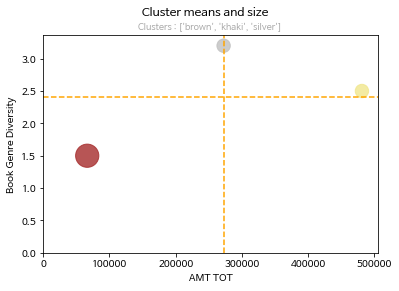

In [65]:
# 군집 프로파일링
plt.scatter(cs602['amt_total'], cs602['num_genre'],
            s = cs602['cust_cnt'] * 45,
            alpha = 0.8,
            color = colors3)
plt.suptitle('Cluster means and size')
subtitle_text = 'Clusters : ' + str(colors3)
# subtitle 용도로 title활용 폰트 작게
plt.title(subtitle_text, fontsize = 9, color = 'darkgrey')
plt.xlabel('AMT TOT')
plt.ylabel('Book Genre Diversity')
plt.xlim(0, cs602['amt_total'].max() * 1.05)
plt.ylim(0, cs602['num_genre'].max() * 1.05)
plt.axvline(cs602['amt_total'].mean(), color = 'orange', linestyle = '--')
plt.axhline(cs602['num_genre'].mean(), color = 'orange', linestyle = '--')
plt.show()